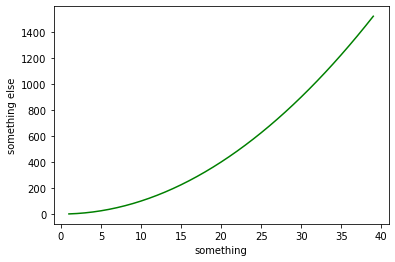

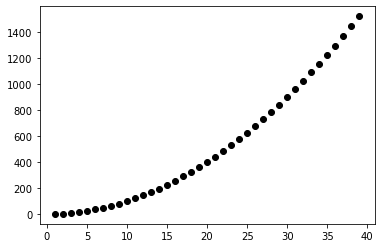

In [24]:
import matplotlib.pyplot as mpl

x = [num for num in range(1,40, 1)]
y = [num**2 for num in x]
mpl.xlabel("something")
mpl.ylabel("something else")
mpl.plot(x, y, color= "g")
mpl.show()
mpl.show(mpl.scatter(x,y, color="k"))





In [46]:
# Getting started with datasets

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

iris = datasets.load_iris()

values = iris.values
target = iris.target

print(values)
for line in iris:
    print(line)

for line in iris["target_names"]:
    print(line)

test_df = pd.DataFrame(iris.data)

print(test_df.head(15))

print(iris.filename)

# c:\Users\Alexd\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv

new_est_df = pd.read_csv("c:/Users/Alexd/anaconda3/lib/site-packages/sklearn/datasets/data/iris.csv")

print(new_est_df.head())

print(iris.feature_names)

final_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(final_df.head())

print(final_df.shape)



"""  
Appearantly the iris dataset does not only come with the data, but also comes will all sorts of extra goodies.
What they are good foor and why they are there is not clear, but when iterating through the iris variable, it's clear lots extra stuff is attached aside from the expected dataset
these goodies are: 

data
target
frame
target_names
DESCR
feature_names
filename
setosa
versicolor
virginica

"""


<built-in method values of Bunch object at 0x000001956B1EE2C0>
data
target
frame
target_names
DESCR
feature_names
filename
setosa
versicolor
virginica
      0    1    2    3
0   5.1  3.5  1.4  0.2
1   4.9  3.0  1.4  0.2
2   4.7  3.2  1.3  0.2
3   4.6  3.1  1.5  0.2
4   5.0  3.6  1.4  0.2
5   5.4  3.9  1.7  0.4
6   4.6  3.4  1.4  0.3
7   5.0  3.4  1.5  0.2
8   4.4  2.9  1.4  0.2
9   4.9  3.1  1.5  0.1
10  5.4  3.7  1.5  0.2
11  4.8  3.4  1.6  0.2
12  4.8  3.0  1.4  0.1
13  4.3  3.0  1.1  0.1
14  5.8  4.0  1.2  0.2
c:\Users\Alexd\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv
   150    4  setosa  versicolor  virginica
0  5.1  3.5     1.4         0.2          0
1  4.9  3.0     1.4         0.2          0
2  4.7  3.2     1.3         0.2          0
3  4.6  3.1     1.5         0.2          0
4  5.0  3.6     1.4         0.2          0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal w

"  \nAppearantly the iris dataset does not only come with the data, but also comes will all sorts of extra goodies.\nWhat they are good foor and why they are there is not clear, but when iterating through the iris variable, it's clear lots extra stuff is attached aside from the expected dataset\nthese goodies are: \n\ndata\ntarget\nframe\ntarget_names\nDESCR\nfeature_names\nfilename\nsetosa\nversicolor\nvirginica\n\n"

In [3]:


# Here we actually split,train,test the data
new_iris= datasets.load_iris(as_frame=True)

for x in iris:
    print(x)
    
print(new_iris.feature_names)
print(new_iris.target_names)

# print(new_iris)

print(new_iris.target.head())
print(new_iris.target.shape)


data
target
frame
target_names
DESCR
feature_names
filename
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32
(150,)


In [104]:
# Given I don't understand the given iris dataset, I am going to try splitting my own datasets
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics

own_df = pd.read_csv("datasets/car_dataset.csv")

print(own_df.head())

feature_columns = list(own_df.columns)
feature_columns.remove(" class")
print(feature_columns)
feature_set= own_df[['buying', " maintenance", " doors", " persons", " luggage_boot", " safety"]].values
label_set = own_df[[" class"]]

# train_x, train_y, test_x, test_y = train_test_split(feature_set, label_set, test_size=0.2)

# Here we encode the feature set
le= preprocessing.LabelEncoder()
for thing in range(len(feature_set[0])):
    feature_set[:, thing] = le.fit_transform(feature_set[:, thing])

print(feature_set)

for x in range(len(feature_set[0])):
    print(x)
    print(feature_set[:,x])

# Here we encode the label set
# (Using label mapping)

convert_dict: dict = {
    "unacc": 0,
    "acc": 1,
    "good": 2,
    "vgood": 3
    }


label_set[" class"] = label_set[" class"].map(convert_dict)    

label_set = np.array(label_set)

print(label_set)

train_x, test_x, train_y, test_y= train_test_split(feature_set, label_set, test_size= 0.10)


# Here we create the model
knn_ml = neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance")

# And here the model gets trained using the .fit() method
knn_ml.fit(train_x, train_y)

prediction = knn_ml.predict(test_x)

accuracy = metrics.accuracy_score(test_y, prediction)

print(f"Our accuracy is: {accuracy}")




#train_x, test_x, train_y, test_y = train_test_split(feature_df, label_series, test_size=0.2)

#print(train_x)
#print(train_y)
# So appearantly train_x takes all the features
# And train_y takes all of the labels

  buying  maintenance  doors  persons  luggage_boot  safety  class
0  vhigh        vhigh      2        2         small     low  unacc
1  vhigh        vhigh      2        2         small     med  unacc
2  vhigh        vhigh      2        2         small    high  unacc
3  vhigh        vhigh      2        2           med     low  unacc
4  vhigh        vhigh      2        2           med     med  unacc
['buying', ' maintenance', ' doors', ' persons', ' luggage_boot', ' safety']
[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]
0
[3 3 3 ... 1 1 1]
1
[3 3 3 ... 1 1 1]
2
[0 0 0 ... 3 3 3]
3
[0 0 0 ... 2 2 2]
4
[2 2 2 ... 0 0 0]
5
[1 2 0 ... 1 2 0]
[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]
Our accuracy is: 0.8554913294797688


<ipython-input-104-5803b0ee8d34>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_set[" class"] = label_set[" class"].map(convert_dict)
c:\Users\Alexd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [138]:
#Testing with Support Vector Machines (SVM's)

# Import all the needed modules
from sklearn import svm
from sklearn.datasets import load_iris

# Load in the dataset
iris = load_iris()

# Seperate feature-set from label-set
feature_set = iris.data
label_set = iris.target

classes: list = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]

print(feature_set.shape)
print(label_set.shape)
# convert the class values


#split feature and label set into train_x, test_x, train_y, test_y
x_train, x_test, y_train, y_test = train_test_split(feature_set, label_set, test_size = 0.2)

#put the sets into the ML
model = svm.SVC()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print(metrics.accuracy_score(y_test, pred))





#Test accuracy


(150, 4)
(150,)
0.9666666666666667
